In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

plt.style.use("dracula")

In [49]:
def L(w, b, x):
    return w * x + b

def g(w, b, x):
    return 1 / (1 + np.exp( -L(w, b, x) ))

def J(w, b=0):
    error = np.mean( np.power(g(w, b, x_train) - y_train, 2) ) / 2
    print(error)
    return error

def loss(w, b, x, y):
    if y == 1:
        return -np.log(g(w, b, x))
    elif y == 0:
        return -np.log(1 - g(w, b, x))
    else:
        assert False

def logistic_error(w, b, x, y):
    residuals = 0
    for i in range(x.shape[0]):
        residuals += loss(w, b, x[i], y[i])
    
    return residuals / (2 * x.shape[0])

def dw(w, b, x, y):
    return np.mean((g(w, b, x) - y) * x)

def db(w, b, x, y):
    return np.mean(g(w, b, x) - y)

def gradient_descent(x, y, w_in, b_in, alpha=0.01, max_iter=10_000):
    w = w_in
    b = b_in
    for _ in range(max_iter):
        d_dw = dw(w, b, x, y)
        d_db = db(w, b, x, y)
        w -= alpha * d_dw
        b -= alpha * d_db
    
    return w, b

def scatter(X, y, step=20):
    X = np.array(X)
    start, end = X.min(), X.max()
    zeroes = y == 0
    ones = y == 1
    zeroes_x, ones_x = X[zeroes].flatten(), X[ones].flatten()
    
    plt.yticks([0, 1])
    plt.xticks(range(start, end, step))
    plt.scatter(zeroes_x, np.zeros( len(zeroes_x) ))
    plt.scatter(ones_x, np.ones( len(ones_x) ), marker='x')

def model_line(model, X):
    start, end = X.min(), X.max()
    x = np.linspace(start, end, 100).reshape(-1, 1)
    w = model.coef_[0]
    b = model.intercept_[0]
    y = g(w, b, x)
    plt.plot(x, y)

In [47]:
age = 'age'
mature = 'mature'
x = np.arange(101)
y = x >= 18

df = pd.DataFrame({age: x, mature: y})
X = df[[age]]
y = df[mature]

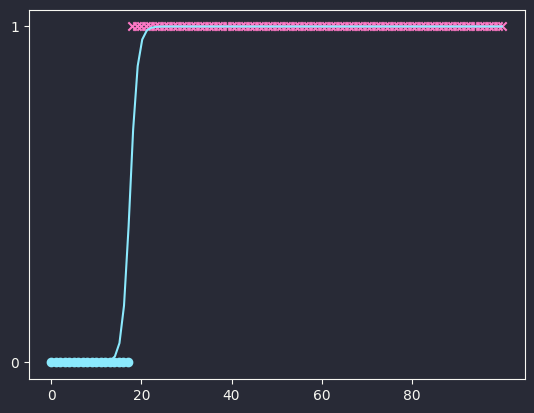

In [60]:
model = LogisticRegression()
model.fit(X, y)

scatter(X, y)
model_line(model, X)

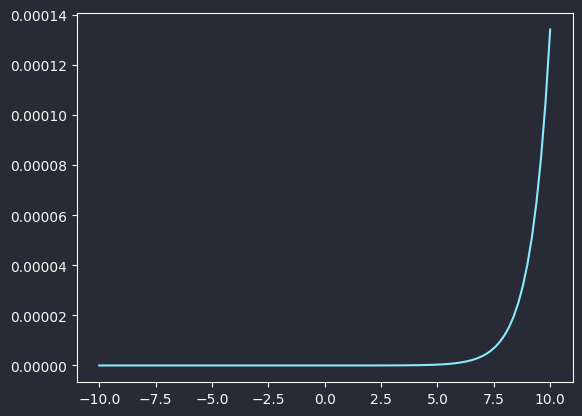

In [42]:
model_line(model)